In [1]:
import pandas as pd

annoy_df = pd.read_csv('../results/index-size/gist-ann.csv')
hnsw_df = pd.read_csv('../results/index-size/gist-hnsw.csv')

size = 1920000.128

annoy_df['size']  = annoy_df['size'] - size
hnsw_df['size'] = hnsw_df['size'] - size

annoy_df['method'] = "annoy"
hnsw_df['method'] = "hnsw"

In [2]:
annoy_df.tail()

,recall,size,tree_nums,method
10,0.62939,590835.77825,110,annoy
11,0.62883,647591.27825,120,annoy
12,0.64425,704708.27825,130,annoy
13,0.66107,761765.02825,140,annoy
14,0.68635,818987.46575,150,annoy


In [3]:
hnsw_df.tail(11)

,recall,size,M,method
4,0.68260,150347.905203,48,hnsw
5,0.71636,181598.780203,56,hnsw
6,0.72263,212842.455984,64,hnsw
7,0.74420,244081.018484,72,hnsw
8,0.75434,275324.768484,80,hnsw
9,0.75520,306557.143484,88,hnsw
10,0.77142,337805.705984,96,hnsw
11,0.77901,369063.112234,104,hnsw
12,0.78006,400308.955984,112,hnsw
13,0.78769,431566.955984,120,hnsw


In [15]:
cols = ['method', 'size', 'recall']

df = pd.concat([annoy_df[cols].tail(11), hnsw_df[cols].tail(10)])
print("recall min, recall max, size min, size max")
print(annoy_df["recall"].min(), annoy_df["recall"].max(), annoy_df["size"].min(), annoy_df["size"].max())
print(hnsw_df["recall"].min(), hnsw_df["recall"].max(), hnsw_df["size"].min(), hnsw_df["size"].max())

print(annoy_df.tail(10))
print(hnsw_df.tail(10))

recall min, recall max, size min, size max
0.22923 0.6863500000000003 20132.715749999974 818987.46575
0.3330999999999999 0.7934500000000001 25449.616140624974 462825.455984375
     recall          size  tree_nums method
5   0.51450  305853.27825         60  annoy
6   0.54329  362827.18450         70  annoy
7   0.57452  419816.15325         80  annoy
8   0.59204  476526.46575         90  annoy
9   0.61442  533816.68450        100  annoy
10  0.62939  590835.77825        110  annoy
11  0.62883  647591.27825        120  annoy
12  0.64425  704708.27825        130  annoy
13  0.66107  761765.02825        140  annoy
14  0.68635  818987.46575        150  annoy
     recall           size    M method
5   0.71636  181598.780203   56   hnsw
6   0.72263  212842.455984   64   hnsw
7   0.74420  244081.018484   72   hnsw
8   0.75434  275324.768484   80   hnsw
9   0.75520  306557.143484   88   hnsw
10  0.77142  337805.705984   96   hnsw
11  0.77901  369063.112234  104   hnsw
12  0.78006  400308.955984  

<Axes: xlabel='recall', ylabel='size'>

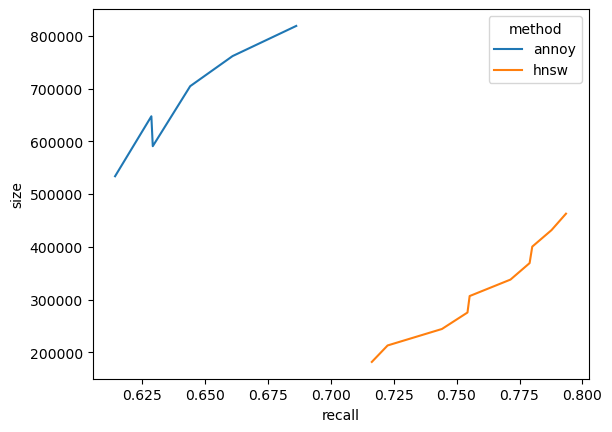

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df.query('recall > 0.6'), x="recall", y="size", hue="method")

In [6]:
annoy_df.iloc[10]

recall            0.62939
size         590835.77825
tree_nums             110
method              annoy
Name: 10, dtype: object

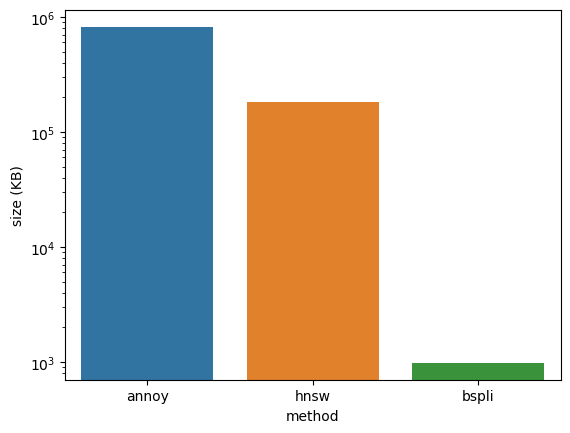

In [7]:
size_df = pd.DataFrame(data={
    'method': ['annoy', 'hnsw', 'bspli'],
    'size': [818987.46575, 181598.780203, 981.347 ]
})

ax =  sns.barplot(data=size_df, x="method", y="size", log=True)
ax.set( ylabel='size (KB)')

plt.show()